In [1]:
import pandas as pd
import glob
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow 
import autokeras as ak
import scipy.io

In [215]:
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "../raw_data/Test2/*.txt"))))

In [216]:
pd.read_csv('../raw_data/Test/results1.txt')

,curr_dens,Volts_tot,Temp_tot,t_tot,SOC_tot
0,20.042216,3.985313,298.150000,0.0,75.000000
1,20.042216,3.985557,298.149698,0.5,75.009523
2,20.042216,3.985784,298.149335,1.0,75.019046
3,20.042216,3.986000,298.148992,1.5,75.028569
4,20.042216,3.986208,298.148668,2.0,75.038092
...,...,...,...,...,...
5600,-1.177744,3.816955,299.184734,2800.0,50.479229
5601,-1.177744,3.817003,299.182497,2800.5,50.478670
5602,-1.177744,3.817049,299.180265,2801.0,50.478110
5603,-1.177744,3.817094,299.178036,2801.5,50.477551


In [30]:
X=df.drop(columns=['SOC_tot'])
y = df.SOC_tot
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle=False)

In [7]:
df

,curr_dens,Volts_tot,Temp_tot,t_tot,SOC_tot
0,5.535696,3.975483,298.150000,0.0,77.000000
1,5.535696,3.975551,298.149788,0.5,77.002630
2,29.080854,4.013349,298.150155,1.0,77.016448
3,-21.539002,3.932545,298.152103,1.5,77.006214
4,-6.852961,3.955785,298.152657,2.0,77.002958
...,...,...,...,...,...
996,-31.620185,3.686770,299.138492,498.0,30.064797
997,-29.330735,3.690256,299.143501,498.5,30.050861
998,-34.257295,3.681930,299.150077,499.0,30.034583
999,-27.961269,3.691993,299.154749,499.5,30.021297


Coefficients: 
 [-3.10915851e-01  1.89757018e+02  5.42861196e+00 -4.30276882e-03]
Mean squared error: 8.30
Coefficient of determination: 0.98


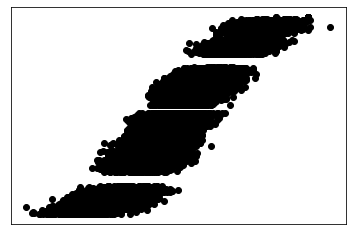

In [5]:
regr = LinearRegression()
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test['Volts_tot'], y_test,  color='black')
#plt.plot(X_test['voltage'], color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [8]:
# It tries 10 different models.
reg = ak.StructuredDataRegressor(max_trials=30, overwrite=True)
# Feed the structured data regressor with training data.
reg.fit(X_train, y_train, epochs=30)
# Predict with the best model.
predicted_y = reg.predict(X_test)
# Evaluate the best model with testing data.
print(reg.evaluate(X_test, y_test))

Trial 30 Complete [00h 01m 18s]
val_loss: 607.755859375

Best val_loss So Far: 0.14743110537528992
Total elapsed time: 00h 38m 43s
INFO:tensorflow:Oracle triggered exit
Epoch 1/30
2169/2169 [==============================] - 3s 1ms/step - loss: 2618.1387 - mean_squared_error: 2618.1387
Epoch 2/30
2169/2169 [==============================] - 2s 1ms/step - loss: 288.5526 - mean_squared_error: 288.5526
Epoch 3/30
2169/2169 [==============================] - 3s 1ms/step - loss: 13.4812 - mean_squared_error: 13.4812
Epoch 4/30
2169/2169 [==============================] - 2s 1ms/step - loss: 5.9848 - mean_squared_error: 5.9848
Epoch 5/30
2169/2169 [==============================] - 2s 1ms/step - loss: 6.2873 - mean_squared_error: 6.2873
Epoch 6/30
2169/2169 [==============================] - 2s 1ms/step - loss: 5.9593 - mean_squared_error: 5.9593
Epoch 7/30
2169/2169 [==============================] - 2s 1ms/step - loss: 6.3150 - mean_squared_error: 6.3150: 0s - loss: 7.4394 - me
Epoch 8/30


2021-10-09 18:49:26.528587: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./structured_data_regressor/best_model/assets
930/930 [==============================] - 1s 878us/step - loss: 0.2359 - mean_squared_error: 0.2359
[0.2358611673116684, 0.2358611673116684]


In [9]:
model = reg.export_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
multi_category_encoding (Mul (None, 4)                 0         
_________________________________________________________________
normalization (Normalization (None, 4)                 9         
_________________________________________________________________
dense (Dense)                (None, 16)                80        
_________________________________________________________________
re_lu (ReLU)                 (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32)                0     

In [10]:
model.save("model_autokeras_v2", save_format="tf")

INFO:tensorflow:Assets written to: model_autokeras_v2/assets


In [11]:
from tensorflow.keras.models import load_model
loaded_model = load_model("model_autokeras", custom_objects=ak.CUSTOM_OBJECTS)

In [12]:
predicted_y = loaded_model.predict(tf.expand_dims(X_test, -1))

<IPython.core.display.Javascript object>

In [13]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

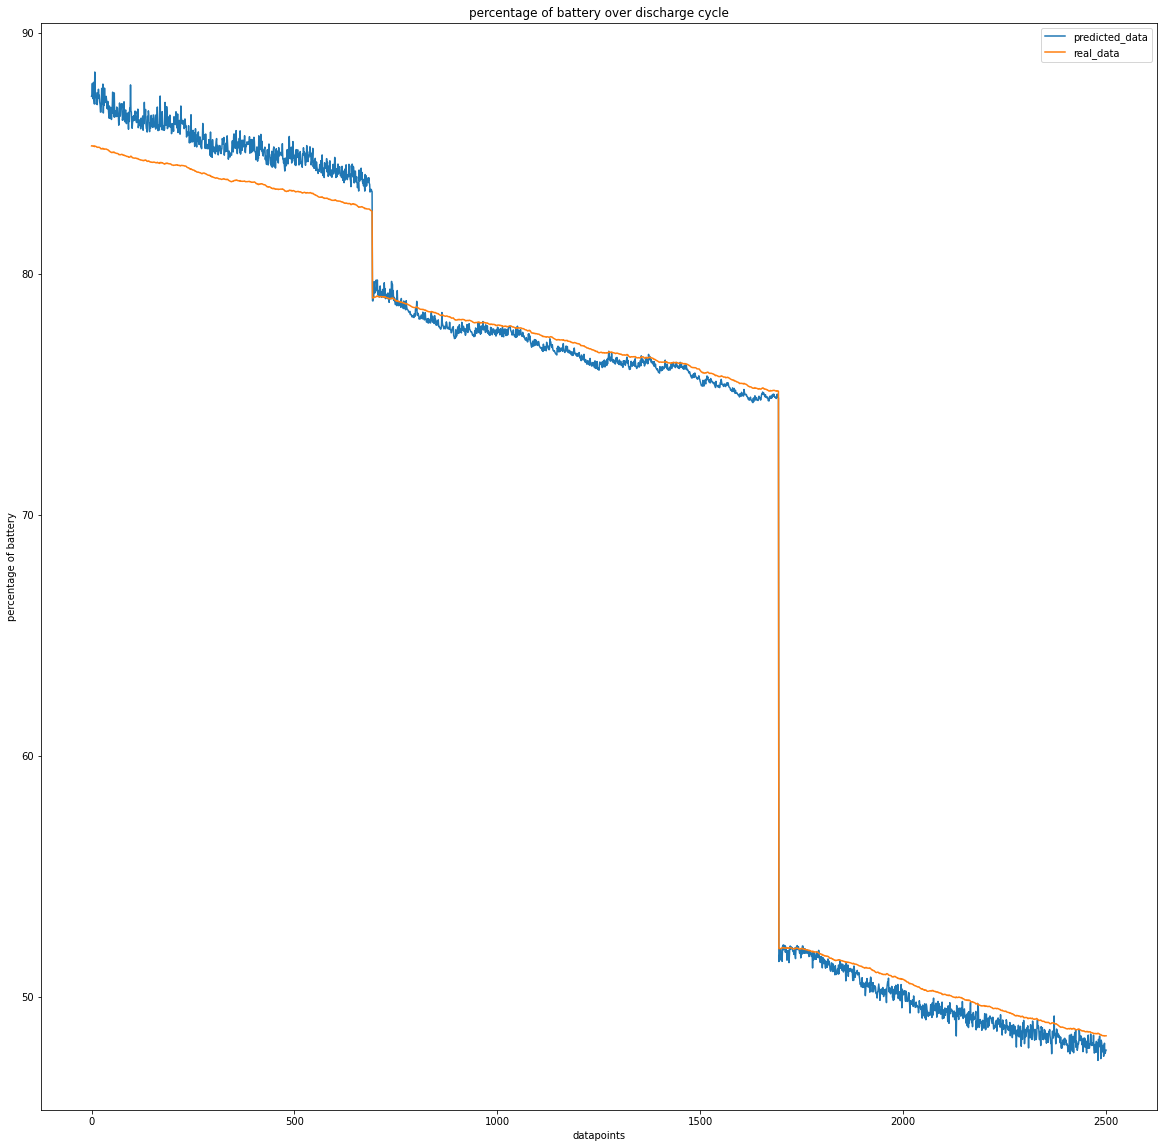

In [14]:
X = np.linspace(0,2500,2500)

plt.figure(figsize=(20,20))
plt.plot(X,predicted_y[3000:5500], label='predicted_data')
plt.plot(X,y_test[3000:5500], label='real_data')
plt.title('percentage of battery over discharge cycle')
plt.xlabel('datapoints')
plt.ylabel('percentage of battery')
plt.legend()
plt.show()

In [16]:
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "../../thesis/raw_data/results/*.txt")))) # read data 
y_col='SOC_tot' # define y variable, i.e., what we want to predict

test_size = int(len(df) * 0.1) # here I ask that the test data will be 10% (0.1) of the entire data
train = df.iloc[:-test_size,:].copy() 
# Try using .loc[row_index,col_indexer] = value instead
test = df.iloc[-test_size:,:].copy()


X_train = train.drop(y_col,axis=1).copy()
y_train = train[[y_col]].copy() # the double brakets here are to keep the y in dataframe format, otherwise it will be pandas Series

Xscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that all the X data will range from 0 to 1
Xscaler.fit(X_train)
scaled_X_train = Xscaler.transform(X_train)
Yscaler = MinMaxScaler(feature_range=(0, 1))
Yscaler.fit(y_train)
scaled_y_train = Yscaler.transform(y_train)
scaled_y_train = scaled_y_train.reshape(-1) # remove the second dimention from y so the shape changes from (n,1) to (n,)

scaled_y_train = np.insert(scaled_y_train, 0, 0)
scaled_y_train = np.delete(scaled_y_train, -1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from tensorflow.keras.layers import GRU
n_input = 25 #how many samples/rows/timesteps to look in the past in order to forecast the next sample
n_features= X_train.shape[1] # how many predictors/Xs/features we have to predict y
b_size = 32 # Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_X_train, scaled_y_train, length=n_input, batch_size=b_size)

model = Sequential()
model.add(GRU(10, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit_generator(generator,epochs=5)

X_test = test.drop(y_col,axis=1).copy()
scaled_X_test = Xscaler.transform(X_test)
test_generator = TimeseriesGenerator(scaled_X_test, np.zeros(len(X_test)), length=n_input, batch_size=b_size)

y_pred_scaled = model.predict(test_generator)
y_pred = Yscaler.inverse_transform(y_pred_scaled)
results = pd.DataFrame({'y_true':test[y_col].values[n_input:],'y_pred':y_pred.ravel()})

/Users/monmac/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5


Exception ignored in: <function CapturableResource.__del__ at 0x144240160>
Traceback (most recent call last):
  File "/Users/monmac/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/training/tracking/tracking.py", line 277, in __del__
    self._destroy_resource()
  File "/Users/monmac/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/eager/def_function.py", line 889, in __call__
    result = self._call(*args, **kwds)
  File "/Users/monmac/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/eager/def_function.py", line 924, in _call
    results = self._stateful_fn(*args, **kwds)
  File "/Users/monmac/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/eager/function.py", line 3022, in __call__
    filtered_flat_args) = self._maybe_define_function(args, kwargs)
  File "/Users/monmac/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/eager/f

14976/14976 [==============================] - 142s 8ms/step - loss: 0.0375
Epoch 2/5
14976/14976 [==============================] - 109s 7ms/step - loss: 9.4353e-04
Epoch 3/5
14976/14976 [==============================] - 105s 7ms/step - loss: 6.4812e-04
Epoch 4/5
14976/14976 [==============================] - 107s 7ms/step - loss: 5.4875e-04
Epoch 5/5
14976/14976 [==============================] - 147s 10ms/step - loss: 4.7485e-04


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

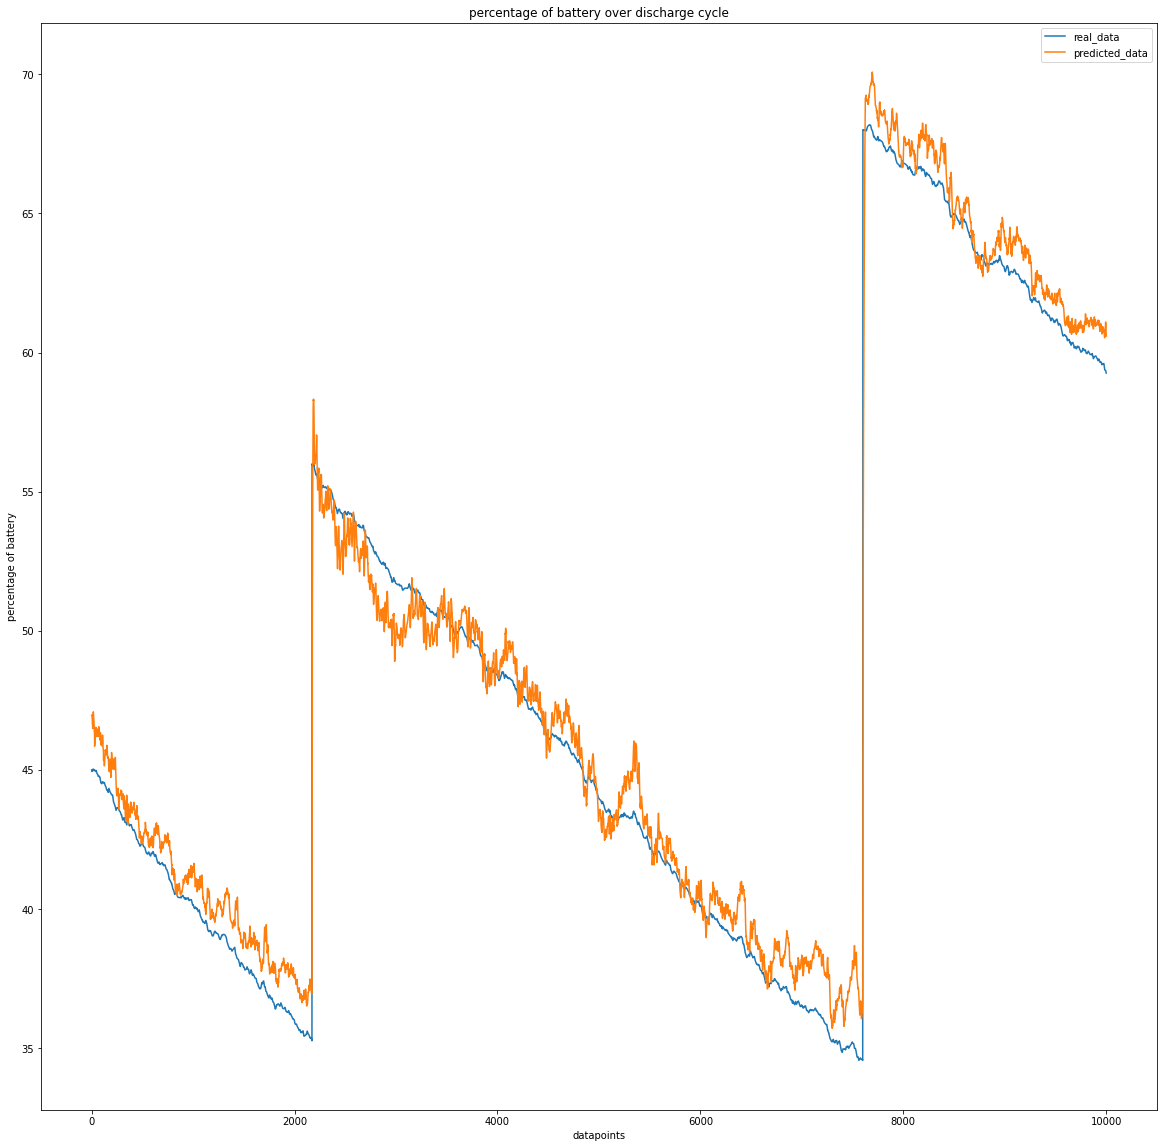

In [18]:
X = np.linspace(0,10000,10000)
plt.figure(figsize=(20,20))
plt.plot(X,results['y_true'][0:10000], label='real_data')
plt.plot(X,results['y_pred'][0:10000], label='predicted_data')
plt.title('percentage of battery over discharge cycle')
plt.xlabel('datapoints')
plt.ylabel('percentage of battery')
plt.legend()
plt.show()

In [34]:
import xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [209]:
model = XGBRegressor(max_depth=20, n_jobs=6)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=20,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=6, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [210]:
y_pred=model.predict(X_test)

In [211]:
y_pred

array([45.731377 , 45.74463  , 45.728302 , ...,  4.1759095,  4.185259 ,
        4.185259 ], dtype=float32)

In [212]:
y_test

1722    45.735556
1723    45.729991
1724    45.725862
1725    45.721733
1726    45.717604
          ...    
5543     3.757894
5544     3.768918
5545     3.779942
5546     3.790967
5547     3.801991
Name: SOC_tot, Length: 159750, dtype: float64

In [213]:
mean_absolute_error(y_test,y_pred)

0.8838557435493707

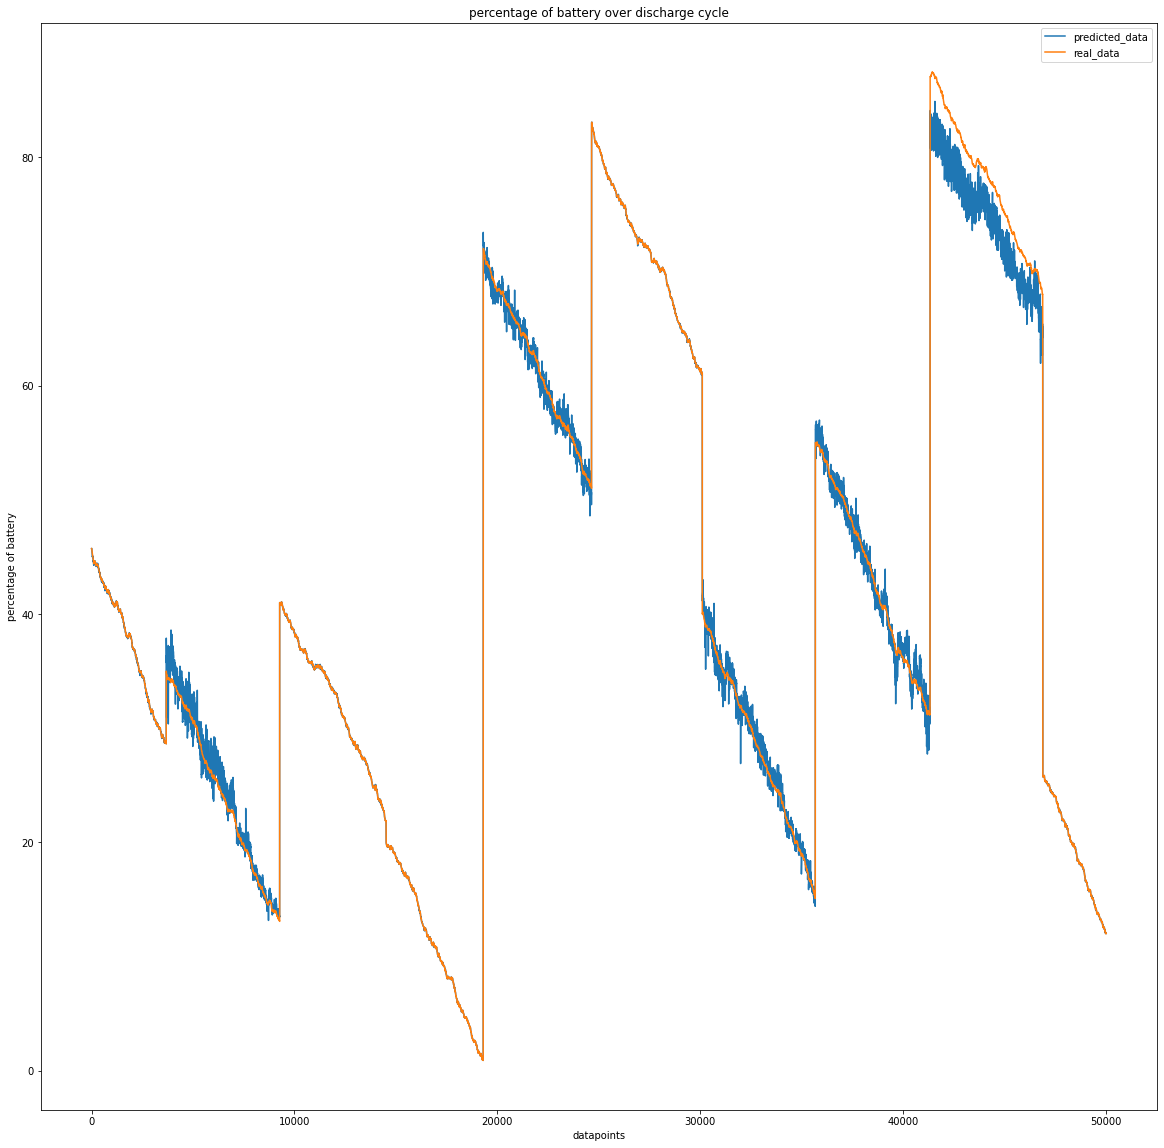

In [214]:
X = np.linspace(0,50000,50000)
plt.figure(figsize=(20,20))
plt.plot(X,y_pred[0:50000], label='predicted_data')
plt.plot(X,y_test[0:50000], label='real_data')
plt.title('percentage of battery over discharge cycle')
plt.xlabel('datapoints')
plt.ylabel('percentage of battery')
plt.legend()
plt.show()

In [48]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "../../thesis/raw_data/results/*.txt")))) # read data 
y_col='SOC_tot' # define y variable, i.e., what we want to predict

test_size = int(len(df) * 0.1) # here I ask that the test data will be 10% (0.1) of the entire data
train = df.iloc[:-test_size,:].copy() 
# Try using .loc[row_index,col_indexer] = value instead
test = df.iloc[-test_size:,:].copy()


X_train = train.drop(y_col,axis=1).copy()
y_train = train[[y_col]].copy() # the double brakets here are to keep the y in dataframe format, otherwise it will be pandas Series

Xscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that all the X data will range from 0 to 1
Xscaler.fit(X_train)
scaled_X_train = Xscaler.transform(X_train)
Yscaler = MinMaxScaler(feature_range=(0, 1))
Yscaler.fit(y_train)
scaled_y_train = Yscaler.transform(y_train)
scaled_y_train = scaled_y_train.reshape(-1) # remove the second dimention from y so the shape changes from (n,1) to (n,)

scaled_y_train = np.insert(scaled_y_train, 0, 0)
scaled_y_train = np.delete(scaled_y_train, -1)
n_input = 25 #how many samples/rows/timesteps to look in the past in order to forecast the next sample
n_features= X_train.shape[1] # how many predictors/Xs/features we have to predict y
b_size = 8 # Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_X_train, scaled_y_train, length=n_input, batch_size=b_size)

model = Sequential()
model.add(LSTM(8, activation='relu', input_shape=(n_input, n_features), return_sequences=True))
model.add(LSTM(8, activation='relu',input_shape=(n_input, n_features)))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit_generator(generator,epochs=10)

X_test = test.drop(y_col,axis=1).copy()
scaled_X_test = Xscaler.transform(X_test)
test_generator = TimeseriesGenerator(scaled_X_test, np.zeros(len(X_test)), length=n_input, batch_size=b_size)

y_pred_scaled = model.predict(test_generator)
y_pred = Yscaler.inverse_transform(y_pred_scaled)
results = pd.DataFrame({'y_true':test[y_col].values[n_input:],'y_pred':y_pred.ravel()})

/Users/monmac/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
59903/59903 [==============================] - 702s 12ms/step - loss: 0.0108
Epoch 2/10
59903/59903 [==============================] - 700s 12ms/step - loss: 4.2460e-04
Epoch 3/10
59903/59903 [==============================] - 644s 11ms/step - loss: 3.1996e-04
Epoch 4/10
59903/59903 [==============================] - 675s 11ms/step - loss: 2.7414e-04
Epoch 5/10
59903/59903 [==============================] - 694s 12ms/step - loss: 2.2369e-04
Epoch 6/10
59903/59903 [==============================] - 4626s 77ms/step - loss: 2.0352e-04
Epoch 7/10
59903/59903 [==============================] - 1080s 18ms/step - loss: 1.9012e-04
Epoch 8/10
59903/59903 [==============================] - 828s 14ms/step - loss: 1.7972e-04
Epoch 9/10
59903/59903 [==============================] - 708s 12ms/step - loss: 1.6726e-04
Epoch 10/10
59903/59903 [==============================] - 690s 12ms/step - loss: 1.5871e-041s -


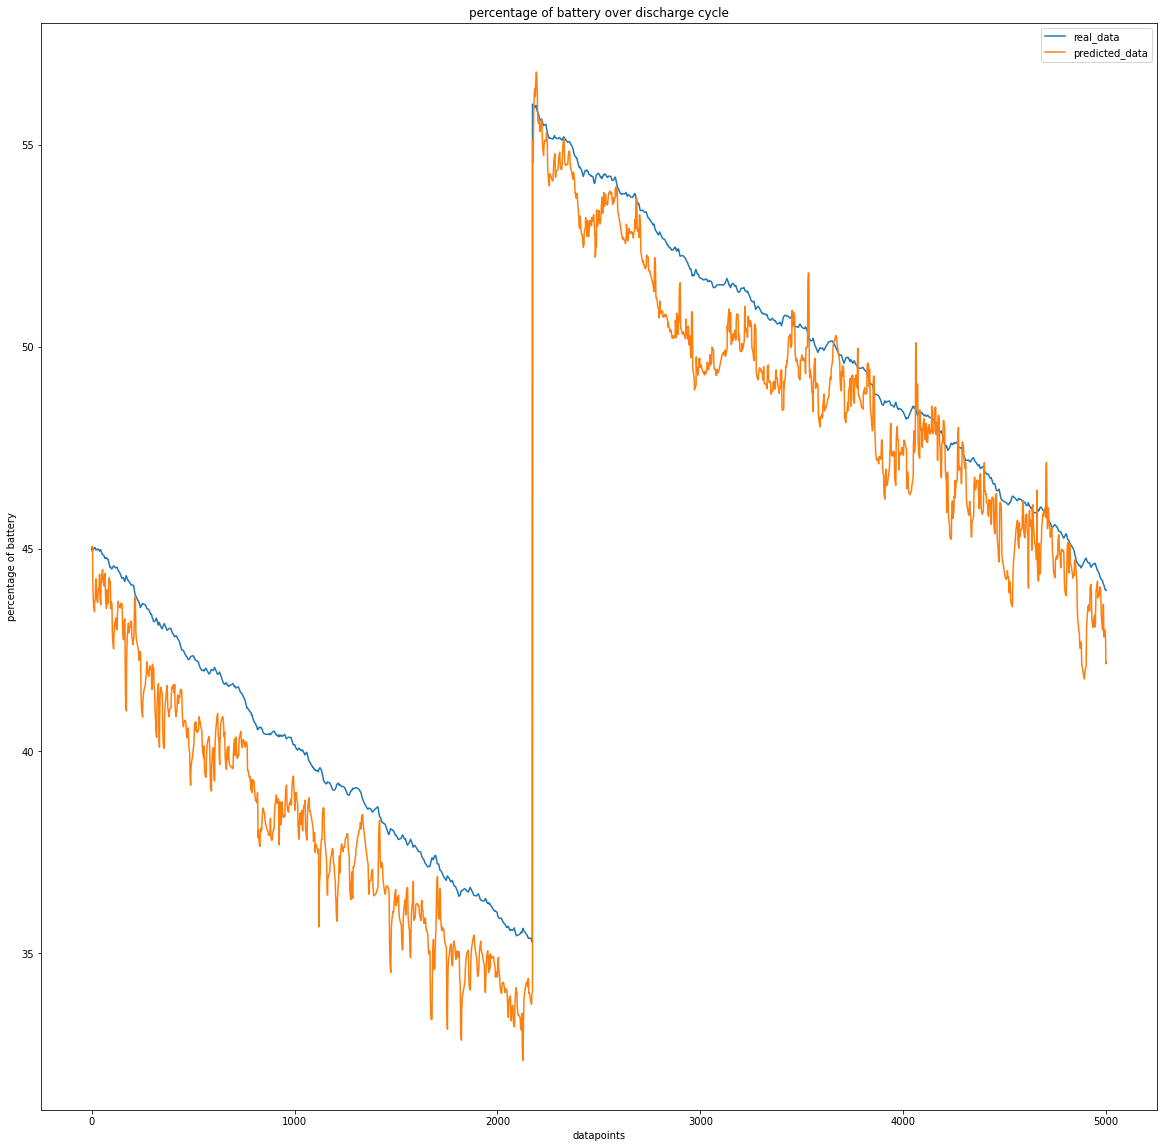

In [169]:
X = np.linspace(0,5000,5000)
plt.figure(figsize=(20,20))
plt.plot(X,results['y_true'][0:5000], label='real_data')
plt.plot(X,results['y_pred'][0:5000], label='predicted_data')
plt.title('percentage of battery over discharge cycle')
plt.xlabel('datapoints')
plt.ylabel('percentage of battery')
plt.legend()
plt.show()

In [49]:
mat = scipy.io.loadmat('/Users/monmac/Downloads/Battery_Uniform_Distribution_Charge_Discharge_DataSet_2Post/data/Matlab/RW9.mat')

In [50]:
df=pd.DataFrame(mat['data'][0][0][0][0], columns=['comment','type','time','relativeTime','voltage','current','temperature','date'])

In [94]:
table = []
for x in range(10):
    rows = []
    for i in range(8):
        rows.append(mat['data'][0][0][0][0][x][i])
    table.append(rows)
    
df1=pd.DataFrame(table, columns=['comment','type','time','relativeTime','voltage','current','temperature','date'])
df1=df.drop(columns=['comment','type','date'])


columns = ['time','relativeTime','voltage','current','temperature']

#this will output in a dataframe the cycle number z contained in the dataset 
z=22
dict1={}
for x in columns:
    list1 = []
    for i in range(len(df1.loc[:,x][z][0])):
        list1.append(df1.loc[:,x][z][0][i])
    dict1[f'{x}']=list1
any_cycle=pd.DataFrame(dict1)
any_cycle=any_cycle.drop(columns='time')
any_cycle=any_cycle.rename(columns={'relativeTime':'t_tot','voltage':'Volts_tot','current':'curr_dens','temperature':'Temp_tot'})
columns = list(X_train.columns)
any_cycle = any_cycle[columns]
any_cycle['Temp_tot']=any_cycle['Temp_tot']+273.15
further_scaled_X_test = Xscaler.transform(any_cycle)
further_test_generator = TimeseriesGenerator(further_scaled_X_test, np.zeros(len(any_cycle)), length=n_input, batch_size=b_size)

y_pred_further=model.predict(further_test_generator)

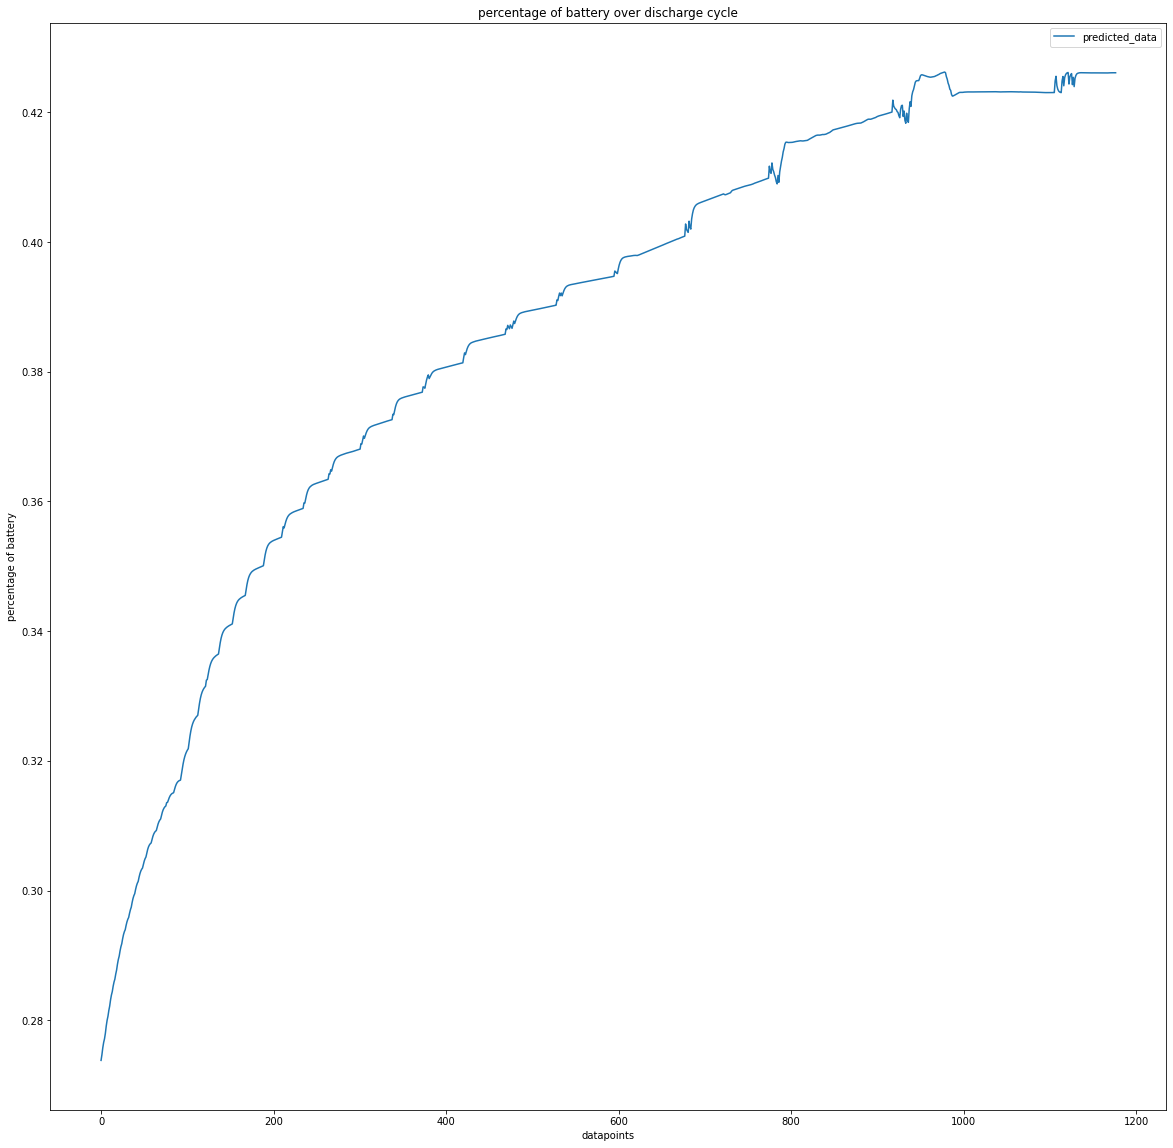

In [95]:
len1 = len(y_pred_further)

X = np.linspace(0,len1,len1)
plt.figure(figsize=(20,20))
plt.plot(X,y_pred_further, label='predicted_data')
plt.title('percentage of battery over discharge cycle')
plt.xlabel('datapoints')
plt.ylabel('percentage of battery')
plt.legend()
plt.show()

In [164]:
mat = scipy.io.loadmat('/Users/monmac/Downloads/Panasonic/10degC/ChargesandPauses/03-28-17_11.52_3423_Pause1.mat')

In [165]:
import pandas as pd

In [166]:
pd.DataFrame(mat['meas'][0][0][1])

,0
0,4.18784
1,4.18720
2,4.18656
3,4.18591
4,4.18527
...,...
56,4.18077
57,4.18077
58,4.18077
59,4.18077


In [167]:
mat['meas'][0]

array([(array([[array(['3/28/2017 11:52:46 AM'], dtype='<U21')],
       [array(['3/28/2017 11:53:46 AM'], dtype='<U21')],
       [array(['3/28/2017 11:54:46 AM'], dtype='<U21')],
       [array(['3/28/2017 11:55:46 AM'], dtype='<U21')],
       [array(['3/28/2017 11:56:46 AM'], dtype='<U21')],
       [array(['3/28/2017 11:57:46 AM'], dtype='<U21')],
       [array(['3/28/2017 11:58:46 AM'], dtype='<U21')],
       [array(['3/28/2017 11:59:46 AM'], dtype='<U21')],
       [array(['3/28/2017 12:00:46 PM'], dtype='<U21')],
       [array(['3/28/2017 12:01:46 PM'], dtype='<U21')],
       [array(['3/28/2017 12:02:46 PM'], dtype='<U21')],
       [array(['3/28/2017 12:03:46 PM'], dtype='<U21')],
       [array(['3/28/2017 12:04:46 PM'], dtype='<U21')],
       [array(['3/28/2017 12:05:46 PM'], dtype='<U21')],
       [array(['3/28/2017 12:06:46 PM'], dtype='<U21')],
       [array(['3/28/2017 12:07:46 PM'], dtype='<U21')],
       [array(['3/28/2017 12:08:46 PM'], dtype='<U21')],
       [array(['3/28/20

In [171]:
mat = scipy.io.loadmat('/Users/monmac/Downloads/Panasonic/10degC/5pulsetest/03-27-17_09.06_10degC_5Pulse_HPPC_Pan18650PF.mat')

In [180]:
mat['meas']

array([[(array([[array(['3/27/2017 9:06:11 AM'], dtype='<U20')],
       [array(['3/27/2017 9:06:11 AM'], dtype='<U20')],
       [array(['3/27/2017 9:06:11 AM'], dtype='<U20')],
       ...,
       [array(['3/28/2017 9:46:10 AM'], dtype='<U20')],
       [array(['3/28/2017 9:46:11 AM'], dtype='<U20')],
       [array(['3/28/2017 9:46:11 AM'], dtype='<U20')]], dtype=object), array([[4.15825],
       [4.15825],
       [4.15825],
       ...,
       [3.29417],
       [3.29481],
       [3.29481]]), array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]), array([[ 0.     ],
       [ 0.     ],
       [ 0.     ],
       ...,
       [-2.62175],
       [-2.62175],
       [-2.62175]]), array([[ 0.     ],
       [ 0.     ],
       [ 0.     ],
       ...,
       [-8.92782],
       [-8.92782],
       [-8.92782]]), array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]), array([[10.559206  ],
       [10.559206  ],
       [10.54762233],

In [175]:
df=pd.DataFrame(mat['meas'][0], columns=['TimeStamp','Voltage','Current','Ah','Wh','Power','Battery_Temp_degC','Time','Chamber_Temp_degC'])

In [189]:
mat['meas'][0][0]

(array([[array(['3/27/2017 9:06:11 AM'], dtype='<U20')],
       [array(['3/27/2017 9:06:11 AM'], dtype='<U20')],
       [array(['3/27/2017 9:06:11 AM'], dtype='<U20')],
       ...,
       [array(['3/28/2017 9:46:10 AM'], dtype='<U20')],
       [array(['3/28/2017 9:46:11 AM'], dtype='<U20')],
       [array(['3/28/2017 9:46:11 AM'], dtype='<U20')]], dtype=object), array([[4.15825],
       [4.15825],
       [4.15825],
       ...,
       [3.29417],
       [3.29481],
       [3.29481]]), array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]), array([[ 0.     ],
       [ 0.     ],
       [ 0.     ],
       ...,
       [-2.62175],
       [-2.62175],
       [-2.62175]]), array([[ 0.     ],
       [ 0.     ],
       [ 0.     ],
       ...,
       [-8.92782],
       [-8.92782],
       [-8.92782]]), array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]), array([[10.559206  ],
       [10.559206  ],
       [10.54762233],
       

In [196]:
pd.json_normalize(mat)

,__header__,__version__,__globals__,meas
0,"b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Crea...",1.0,[],"[[[[[array(['3/27/2017 9:06:11 AM'], dtype='<U..."


In [205]:
import autokeras as ak 
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "../../thesis/raw_data/results/*.txt")))) # read data 

X=df.drop(columns=['SOC_tot'])
y = df.SOC_tot
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle=False)

predict_from = 1
predict_until = 50
lookback = 100
clf = ak.TimeseriesForecaster(
    lookback=lookback,
    predict_from=predict_from,
    predict_until=predict_until,
    max_trials=1,
    objective="val_loss",
)
# Train the TimeSeriesForecaster with train data
clf.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    batch_size=8,
    epochs=10,
)
# Predict with the best model(includes original training data).
predictions = clf.predict(data_x_test)
print(predictions.shape)
# Evaluate the best model with testing data.
print(clf.evaluate(data_x_val, data_y_val))
model.fit_generator(generator,epochs=10)

INFO:tensorflow:Reloading Oracle from existing project ./time_series_forecaster/oracle.json

Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
timeseries_bloc...|True              |?                 
timeseries_bloc...|lstm              |?                 
timeseries_bloc...|2                 |?                 
regression_head...|0                 |?                 
optimizer         |adam              |?                 
learning_rate     |0.001             |?                 

Epoch 1/10
  46569/Unknown - 4654s 100ms/step - loss: 246.3960 - mean_squared_error: 246.3960

InvalidArgumentError:  Incompatible shapes: [8,1] vs. [5,1]
	 [[node mean_squared_error/SquaredDifference (defined at Users/monmac/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/autokeras/utils/utils.py:88) ]] [Op:__inference_train_function_6100268]

Function call stack:
train_function


In [199]:
len(X_train)

372748

In [204]:
372748 % 2

0

In [235]:
mat = scipy.io.loadmat('/Users/monmac/Downloads/FInal year research project - Li ion battery/X_TrainCycle1.mat')

In [236]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 30 22:44:09 2020',
 '__version__': '1.0',
 '__globals__': [],
 'X_Train': array([[array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.98716489e+00, 3.98716489e+00, 3.98716489e+00, ...,
         3.83736763e+00, 3.83735349e+00, 3.83735000e+00],
        [2.98150000e+02, 2.98150000e+02, 2.98150000e+02, ...,
         3.01781851e+02, 3.01773275e+02, 3.01764713e+02],
        [0.00000000e+00, 5.00000000e-01, 1.00000000e+00, ...,
         1.36900000e+03, 1.36950000e+03, 1.37000000e+03]])],
        [array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.98716489e+00, 3.98716489e+00, 3.98716489e+00, ...,
         3.93269532e+00, 3.93273181e+00, 3.93276932e+00],
        [2.98150000e+02, 2.98150000e+02, 2.98150000e+02, ...,
         2.99936734e+02, 2.99932404e+02, 2.999280

In [237]:
mat['X_Train']

array([[array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.98716489e+00, 3.98716489e+00, 3.98716489e+00, ...,
        3.83736763e+00, 3.83735349e+00, 3.83735000e+00],
       [2.98150000e+02, 2.98150000e+02, 2.98150000e+02, ...,
        3.01781851e+02, 3.01773275e+02, 3.01764713e+02],
       [0.00000000e+00, 5.00000000e-01, 1.00000000e+00, ...,
        1.36900000e+03, 1.36950000e+03, 1.37000000e+03]])],
       [array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.98716489e+00, 3.98716489e+00, 3.98716489e+00, ...,
        3.93269532e+00, 3.93273181e+00, 3.93276932e+00],
       [2.98150000e+02, 2.98150000e+02, 2.98150000e+02, ...,
        2.99936734e+02, 2.99932404e+02, 2.99928082e+02],
       [0.00000000e+00, 5.00000000e-01, 1.00000000e+00, ...,
        6.00000000e+02, 6.00500000e+02, 6.01000000e+02]])],
       [array([[ 0.00000000e+00,  

In [249]:
df = pd.DataFrame(np.hstack((mat['X_Train'][0])))

In [250]:
df.T

,0,1,2,3
0,0.000000,3.987165,298.150000,0.0
1,0.000000,3.987165,298.150000,0.5
2,0.000000,3.987165,298.150000,1.0
3,0.000000,3.987165,298.150000,1.5
4,0.000000,3.987165,298.150000,2.0
...,...,...,...,...
2736,33.215909,3.886588,301.799269,1368.0
2737,0.000000,3.837396,301.790439,1368.5
2738,0.000000,3.837368,301.781851,1369.0
2739,0.000000,3.837353,301.773275,1369.5


In [242]:
mat_y = scipy.io.loadmat('/Users/monmac/Downloads/FInal year research project - Li ion battery/Y_TrainCycle1.mat')

In [243]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 30 22:44:09 2020',
 '__version__': '1.0',
 '__globals__': [],
 'X_Train': array([[array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.98716489e+00, 3.98716489e+00, 3.98716489e+00, ...,
         3.83736763e+00, 3.83735349e+00, 3.83735000e+00],
        [2.98150000e+02, 2.98150000e+02, 2.98150000e+02, ...,
         3.01781851e+02, 3.01773275e+02, 3.01764713e+02],
        [0.00000000e+00, 5.00000000e-01, 1.00000000e+00, ...,
         1.36900000e+03, 1.36950000e+03, 1.37000000e+03]])],
        [array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.98716489e+00, 3.98716489e+00, 3.98716489e+00, ...,
         3.93269532e+00, 3.93273181e+00, 3.93276932e+00],
        [2.98150000e+02, 2.98150000e+02, 2.98150000e+02, ...,
         2.99936734e+02, 2.99932404e+02, 2.999280

In [247]:
df1 = pd.DataFrame(np.hstack((mat_y['Y_Train'][0])))

In [248]:
df1.T

,0
0,80.000000
1,80.000000
2,80.000000
3,80.000000
4,80.000000
...,...
2736,56.742832
2737,56.742832
2738,56.742832
2739,56.742832


In [400]:
#UDDS
df_udds=pd.read_csv('/Users/monmac/Desktop/uddscol.txt').reset_index()
df_udds['level_0']=df_udds['level_0'].str.split('\t')
df_udds=pd.DataFrame(df_udds['level_0'].to_list(), columns = ['time','speed'])
df_udds=df_udds[1:]
df_udds['speed']=df_udds['speed'].astype('float32')
df_udds['accel']=df_udds['speed'].diff(periods=1)
max_accel_udds=df_udds['accel'].max()
prop_constant_udds = max_accel_udds / 6 
df_udds['current_base'] = prop_constant_udds * df_udds['accel']
df_udds['current_real'] = 0 
for i in df_udds['current_base'].index:
    if df_udds.loc[i:i,'current_base'].max()<0:
        df_udds.loc[i:i,'current_real']=df_udds.loc[i:i,'current_base']*0.25
    if df_udds.loc[i:i,'current_base'].max()>0:
        df_udds.loc[i:i,'current_real']=df_udds.loc[i:i,'current_base']
    if df_udds.loc[i:i,'current_base'].max()==0:
        df_udds.loc[i:i,'current_real'] = 0        
        
#US06
df_us06=pd.read_csv('/Users/monmac/Desktop/us06col.txt').reset_index()
df_us06['US06.TXT\tUS06 Supplemental FTP Driving Schedule']=df_us06['US06.TXT\tUS06 Supplemental FTP Driving Schedule'].str.split('\t')
df_us06=pd.DataFrame(df_us06['US06.TXT\tUS06 Supplemental FTP Driving Schedule'].to_list(), columns = ['time','speed'])
df_us06=df_us06[1:]
df_us06['speed']=df_us06['speed'].astype('float32')
df_us06['accel']=df_us06['speed'].diff(periods=1)
max_accel_us06=df_us06['accel'].max()
prop_constant_us06 = max_accel_us06 / 6 
df_us06['current_base'] = prop_constant_us06 * df_us06['accel']
df_us06['current_real'] = 0 
for i in df_us06['current_base'].index:
    if df_us06.loc[i:i,'current_base'].max()<0:
        df_us06.loc[i:i,'current_real']=df_us06.loc[i:i,'current_base']*0.25
    if df_us06.loc[i:i,'current_base'].max()>0:
        df_us06.loc[i:i,'current_real']=df_us06.loc[i:i,'current_base']
    if df_us06.loc[i:i,'current_base'].max()==0:
        df_us06.loc[i:i,'current_real'] = 0

In [402]:
df_udds.head(50)

,time,speed,accel,current_base,current_real
1,0,0.000000,NaN,NaN,0.000000
2,1,0.000000,0.000000,0.000000,0.000000
3,2,0.000000,0.000000,0.000000,0.000000
4,3,0.000000,0.000000,0.000000,0.000000
5,4,0.000000,0.000000,0.000000,0.000000
6,5,0.000000,0.000000,0.000000,0.000000
7,6,0.000000,0.000000,0.000000,0.000000
8,7,0.000000,0.000000,0.000000,0.000000
9,8,0.000000,0.000000,0.000000,0.000000
10,9,0.000000,0.000000,0.000000,0.000000


In [394]:
dict_output = {name:col.values for name,col in df_udds.items()}

In [399]:
destination_folder_path = '/Users/monmac/Desktop/'
scipy.io.savemat(os.path.join(destination_folder_path, 'test_v1_mat.mat'), dict_output)